In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_palette('colorblind')
sns.set_context('poster')

In [2]:
def mnras_size(fig_width_pt, square=False):
    inches_per_pt = 1.0/72.00              # Convert pt to inches
    golden_mean = (np.sqrt(5)-1.0)/2.0     # Most aesthetic ratio
    fig_width = fig_width_pt*inches_per_pt # Figure width in inches
    if square:
        fig_height = fig_width
    else:
        fig_height = fig_width*golden_mean
    return [fig_width,fig_height]

In [3]:
mal = pd.read_csv('~/PhD/malatium/data/atium.csv', index_col=0)
mal.head(5)

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,eV2,l_P,P,u_P,l_vsini,vsini,u_vsini,rhat_flag,eye_flag,ebprp
0,1435467,6326,3.0164,70.369,77,0.034,0.1,6.3,0.01,0.3513,...,0.059509,0.620728,6.541180,0.757775,0.672485,11.669772,0.724637,NaN,0,0.000777
1,2837475,6614,1.6270,75.729,77,0.041,0.1,8.2,0.01,0.1757,...,0.046604,0.154079,3.499114,0.172064,0.555348,22.351415,0.540087,NaN,0,0.000587
2,3427720,6045,2.2339,120.068,77,0.031,0.1,10.7,-0.06,0.2396,...,0.031153,11.821919,31.590512,10.236450,0.305072,1.473754,0.278017,NaN,0,0.000607
3,3456181,6384,2.0901,52.264,77,0.041,0.1,8.3,-0.15,0.1278,...,0.059344,2.790842,10.699926,2.006340,0.734456,8.634898,0.746225,NaN,0,0.000788
4,3632418,6193,2.6331,60.704,77,0.019,0.1,3.0,-0.12,0.1757,...,0.034584,0.729588,11.205550,0.624963,0.222056,8.216637,0.228105,NaN,0,0.000551


In [4]:
ms = mal.hrclass == 'MS'
h = mal.hrclass == 'H'
sg = mal.hrclass == 'SG'

In [5]:
mx = mal.Teff.max()+100
mn = mal.Teff.min()-100
mx -= mn
m = 6250 
m -= mn
mn -= mn

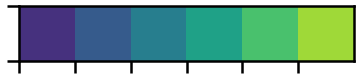

In [22]:
snsmap = sns.color_palette('viridis')
sns.palplot(snsmap)

In [11]:
import glob
tracks = glob.glob('../data/tracks/*.csv')
tracks

['../data/tracks/m1.50_ovh0.00d_udh0.00d_ovhe0.00s_z0.01493_y0.26588.csv',
 '../data/tracks/m1.00_ovh0.00d_udh0.00d_ovhe0.00s_z0.01493_y0.26588.csv',
 '../data/tracks/m1.50_ovh0.02d_udh0.00d_ovhe0.00s_z0.01493_y0.26588.csv']

In [14]:
m1 = pd.read_csv(tracks[1])
m15 = pd.read_csv(tracks[0])
print(m1.columns)

Index(['model_number', 'elapsed_time', 'star_age', 'star_mass', 'effective_T',
       'photosphere_L', 'photosphere_r', 'luminosity', 'radius', 'gravity',
       ...
       'burn_qtop_30', 'burn2_top1', 'burn2_bot1', 'burn2_top2', 'burn2_bot2',
       'burn2_top3', 'burn2_bot3', 'burn2_top4', 'burn2_bot4', 'coupling'],
      dtype='object', length=190)


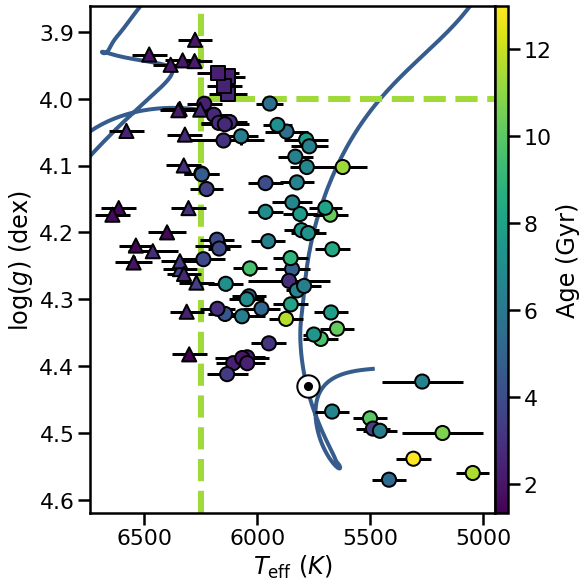

In [28]:
fig, ax = plt.subplots(figsize=mnras_size(595, square=True)) 
c = ax.scatter(mal.Teff[ms], mal.modlogg[ms], c=mal.age[ms], vmin= mal.age.min(), vmax = mal.age.max(),
               ec='k', lw=2, s=200, zorder=3)
c = ax.scatter(mal.Teff[sg], mal.modlogg[sg], c=mal.age[sg], vmin= mal.age.min(), vmax = mal.age.max(),
               ec='k', lw=2, marker=',', s=200, zorder=3)
c = ax.scatter(mal.Teff[h], mal.modlogg[h], c=mal.age[h], vmin= mal.age.min(), vmax = mal.age.max(),
               ec='k', marker='^', lw=2, s=200, zorder=3)

ax.errorbar(mal.Teff, mal.modlogg, xerr=mal.eTeff, yerr=[mal.lomodlogg, mal.upmodlogg],
            fmt='|', c='k', zorder=2, lw=3)

ax.scatter([5777, np.nan], [4.43, np.nan], c='k', vmin=mal.age.min(), vmax=mal.age.max(), s=50, zorder=3)
ax.scatter([5777, np.nan], [4.43, np.nan], ec='k', fc='w', vmin=mal.age.min(), vmax=mal.age.max(), s=500, zorder=2)

plt.plot(m1.effective_T, np.log10(m1.gravity), c=snsmap[1], ls='-', lw=4, zorder=0)
plt.plot(m15.effective_T, np.log10(m15.gravity), c=snsmap[1], ls='-', lw=4, zorder=0)

ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlim(mal.Teff.max()+100, mal.Teff.min()-100)
ax.set_ylim(mal.modlogg.max()+0.05, mal.modlogg.min()-0.05)
fig.colorbar(c,label='Age (Gyr)', pad=0,aspect=40)
ax.axvline(6250, c=snsmap[-1], ls='--', lw=6, zorder=0)
ax.axhline(4.0, c=snsmap[-1], ls='--', lw=6, xmin=1 - m/mx, zorder=1)
ax.set_xlabel(r'$T_{\rm eff}$ ($K$)')
ax.set_ylabel(r'$\log(g)$ (dex)')
fig.tight_layout()
plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/data.pdf', rasterized=True)

In [21]:
mal.modmass.max()

1.5678